# Retrieving Runs.


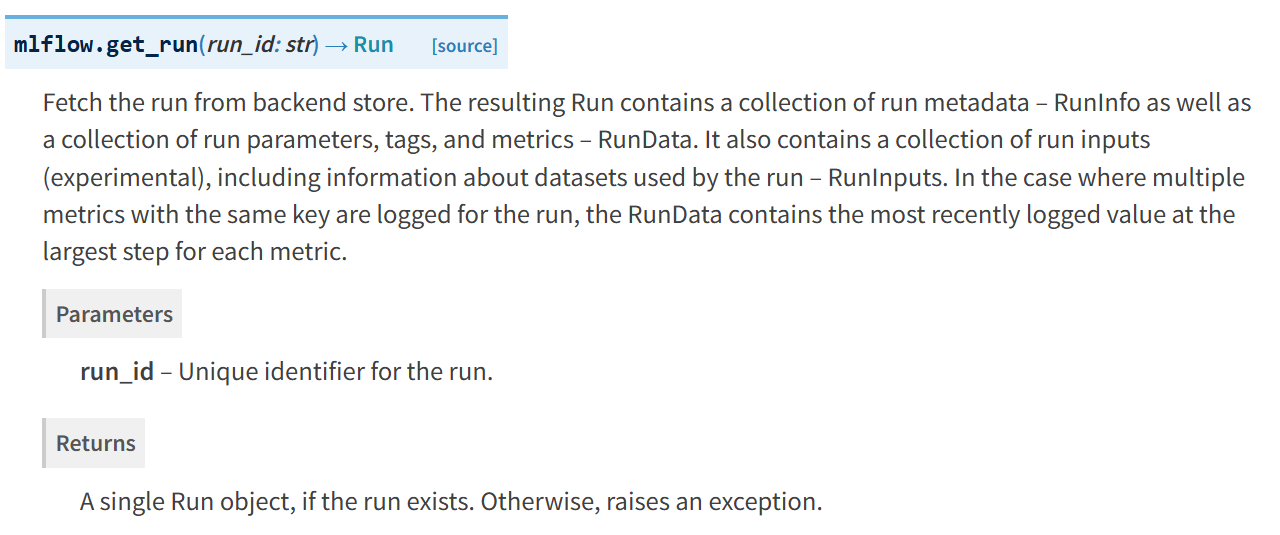

In [1]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [2]:
run_id = "d8fa3ff807a248d38a1a72956710a0cc"
run = mlflow.get_run(run_id)
print(run.info.to_proto())
print(run.data.to_dictionary())

run_uuid: "d8fa3ff807a248d38a1a72956710a0cc"
experiment_id: "0"
run_name: "masked-stork-52"
user_id: "manue"
status: FINISHED
start_time: 1740706836321
end_time: 1740706836341
artifact_uri: "file:///C:/Users/manue/projects/mlflow_for_ml_dev/mlruns/0/d8fa3ff807a248d38a1a72956710a0cc/artifacts"
lifecycle_stage: "active"
run_id: "d8fa3ff807a248d38a1a72956710a0cc"

{'metrics': {}, 'params': {}, 'tags': {'mlflow.runName': 'masked-stork-52', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


# Get run using the client
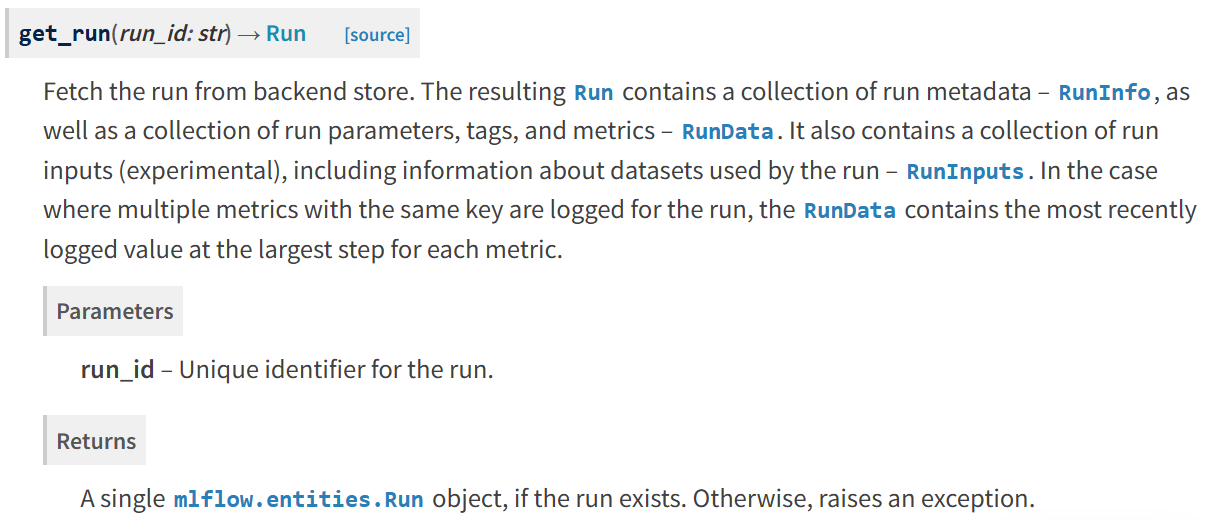

In [3]:
client = mlflow.MlflowClient()

# Get the run object
run = client.get_run(run_id)

# Get the run's data
print(run.data.to_dictionary())

{'metrics': {}, 'params': {}, 'tags': {'mlflow.runName': 'masked-stork-52', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


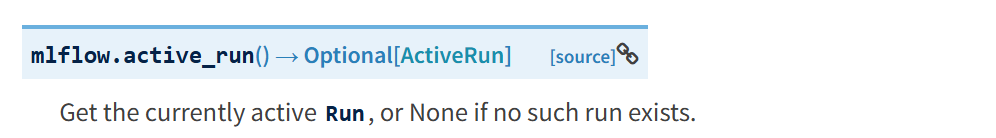

In [4]:
# This method will return the currently active run (if one exists), or None if no run is active
run  = mlflow.active_run()

print(run)

None


In [5]:
# Starting new active run
mlflow.start_run()
# Get the active run
run = mlflow.active_run()
# Print the lifecycle stage of the active run
print(run.info.lifecycle_stage)
print(run.info.status)
print(run.info.run_name)
# End the active run
mlflow.end_run()
# Get the active run
run = mlflow.active_run()

print(run)

active
RUNNING
nimble-shrike-369
None


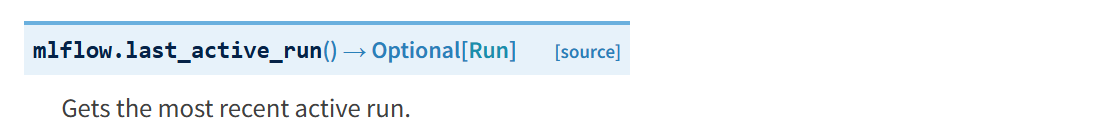

In [6]:
run = mlflow.last_active_run()

print(run)
print(run.info.run_name)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'nimble-shrike-369',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue'}>, info=<RunInfo: artifact_uri='file:///C:/Users/manue/projects/mlflow_for_ml_dev/mlruns/0/078d7b72ecb845099df4a05267337c4a/artifacts', end_time=1740707261930, experiment_id='0', lifecycle_stage='active', run_id='078d7b72ecb845099df4a05267337c4a', run_name='nimble-shrike-369', run_uuid='078d7b72ecb845099df4a05267337c4a', start_time=1740707261908, status='FINISHED', user_id='manue'>, inputs=<RunInputs: dataset_inputs=[]>>
nimble-shrike-369


In [7]:
run.info.to_proto()

run_uuid: "078d7b72ecb845099df4a05267337c4a"
experiment_id: "0"
run_name: "nimble-shrike-369"
user_id: "manue"
status: FINISHED
start_time: 1740707261908
end_time: 1740707261930
artifact_uri: "file:///C:/Users/manue/projects/mlflow_for_ml_dev/mlruns/0/078d7b72ecb845099df4a05267337c4a/artifacts"
lifecycle_stage: "active"
run_id: "078d7b72ecb845099df4a05267337c4a"

In [8]:
with mlflow.start_run(run_name="started-run") as run:
    print("WITHIN RUN CONTEXT\n")

print("OUTSIDE RUN CONTEXT")
run1 = mlflow.active_run()

run2 = mlflow.last_active_run()

WITHIN RUN CONTEXT

OUTSIDE RUN CONTEXT


In [9]:
run1 == None

True

In [10]:
# This will print data since there was an active run in the current python process.
print(run2.info.to_proto())
print("Run Status: ",run2.info.status)

run_uuid: "a47f9fc25bff4f378ce521e12898d42b"
experiment_id: "0"
run_name: "started-run"
user_id: "manue"
status: FINISHED
start_time: 1740707412136
end_time: 1740707412160
artifact_uri: "file:///C:/Users/manue/projects/mlflow_for_ml_dev/mlruns/0/a47f9fc25bff4f378ce521e12898d42b/artifacts"
lifecycle_stage: "active"
run_id: "a47f9fc25bff4f378ce521e12898d42b"

Run Status:  FINISHED
